# Guided Capstone Step 6 Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [225]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

%pwd

'/Users/suhas/Dropbox/Suhas Work/ParrCompWshop/SpringBoard/project_folders/Springboard'

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you cose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [226]:
df=pd.read_csv('./data/step3_output.csv',index_col=0)#read the cleaned data from EDA step3
df=df.reset_index(drop=True) 
df_copy=df                                           # create df_copy to use later
x = df_copy.drop(['Name','state','AdultWeekend'], axis =1) #from previous step state did not help in prediction
y=df['AdultWeekend']

x_scaled=preprocessing.scale(x, axis=0, with_mean=True, with_std=True, copy=True)#for normalising data columns
x_scaled.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)#traning data split

#all second model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
#lm=linear_model.Ridge(alpha=.5)
model = lm.fit(X_train,y_train)

score=lm.score(X_test, y_test)
y_pred = lm.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('score',score,'rmse',rmse)

#To retrieve the intercept:
print(lm.intercept_)
print(df['AdultWeekend'].mean())

feature_names=x.columns.values
data=abs(lm.coef_)

#For retrieving the slope:
coeff_df=pd.DataFrame(data,index=feature_names,columns=['abs linear coeff'])

coeff_df.sort_values(by=['abs linear coeff'],ascending=False).head(20)

score 0.6831198122301751 rmse 8.213565644053524
57.19752824110139
57.24973848630152


,abs linear coeff
AdultWeekday,11.614573
summit_elev,3.649811
vertical_drop,2.727608
New_Column_Cluster,2.244465
averageSnowfall,1.792380
daysOpenLastYear,1.375480
quad,1.345504
TerrainParks,1.271443
surface,1.227476
double,1.045825


In [227]:
explained_variance_score(y_test, y_pred, sample_weight=None)

0.6833246750141231

## Review the results 

In [228]:
y_pred = model.predict(X_test)
print(explained_variance_score(y_test, y_pred))


0.6833246750141231


In [229]:
raw_df=pd.read_csv('updated_ski_data.csv',index_col=None)
BigMountainData=raw_df[raw_df['Name'].str.contains('Whitefish Mountain Resort')]                                           # create df_copy to use later


**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [230]:
BM_dropped=BigMountainData.drop(['Name','state','AdultWeekend','Region','base_elev'], axis =1)

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [231]:
BM_dropped.head()


,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac
151,6817,2353,0,0.0,0,3,2,6,0,3,...,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,123.0,600.0


In [232]:
BM_dropped['New_Column_Cluster']=0##BigMountain data was dropped during cleaning

In [233]:
long_x=x.append(BM_dropped)#BigMountain data was dropped during cleaning, it is added here to go normalised values

In [234]:
long_x.tail()

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,New_Column_Cluster
168,7428,810,0,0.0,0,0,0,1,1,1,...,1.0,184.0,18.0,61.0,81.0,310.0,42.000000,77.0,0.0,1
169,7808,1571,0,0.0,0,0,1,1,1,0,...,1.0,400.0,250.0,121.0,80.0,300.0,59.000000,123.0,110.0,1
170,9663,990,0,0.0,0,0,0,1,3,1,...,0.7,75.0,30.0,131.0,59.0,250.0,49.000000,123.0,0.0,1
171,9500,1100,0,0.0,0,0,0,2,0,0,...,0.4,370.0,100.0,131.0,81.0,150.0,57.916957,123.0,0.0,1
151,6817,2353,0,0.0,0,3,2,6,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.000000,123.0,600.0,0


In [235]:
long_x_scaled=preprocessing.scale(long_x, axis=0, with_mean=True, with_std=True, copy=True)#for normalising data columns

In [236]:
long_x_scaled[-1,:].shape

(23,)

In [237]:
BM_dropped.shape

(1, 23)

In [238]:
trial=pd.DataFrame(data=None,columns=BM_dropped.columns)

In [239]:
BM_dropped.append(BM_dropped)

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,New_Column_Cluster
151,6817,2353,0,0.0,0,3,2,6,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,123.0,600.0,0
151,6817,2353,0,0.0,0,3,2,6,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,123.0,600.0,0


In [240]:
BM_dropped.iloc[-1]=long_x_scaled[-1,:]

In [241]:
BM_dropped.head()

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,New_Column_Cluster
151,0.981173,2.536033,0.0,0.0,0.0,4.41827,2.047905,3.717046,-1.152171,0.520678,...,3.033495,7.77321,6.768149,0.704431,0.880466,1.750895,1.902905,0.478281,8.730315,-0.767236


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [243]:
new_product=BM_dropped
predicted_price = model.predict(new_product)
predicted_price


array([81.93325797])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [244]:
BigMountainData['AdultWeekend']

151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

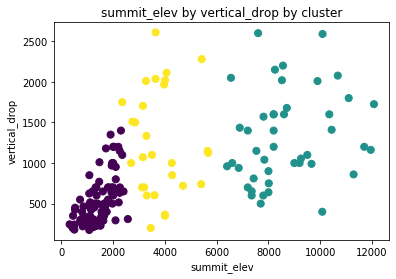

In [294]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['New_Column_Cluster'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('./figures/fig1.png',bbox_inches='tight')

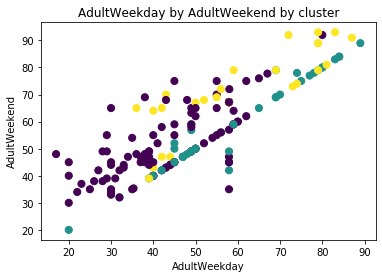

In [295]:
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['New_Column_Cluster'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekday by AdultWeekend by cluster')
plt.savefig('./figures/fig2.png',bbox_inches='tight')

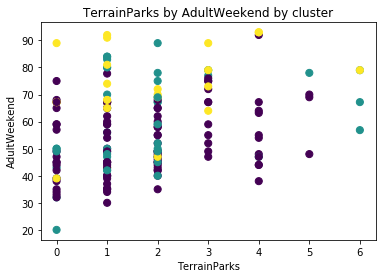

In [296]:
plt.scatter(df['TerrainParks'], df['AdultWeekend'], c=df['New_Column_Cluster'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('TerrainParks')
plt.ylabel('AdultWeekend')
plt.title('TerrainParks by AdultWeekend by cluster')
plt.savefig('./figures/fig3.png',bbox_inches='tight')

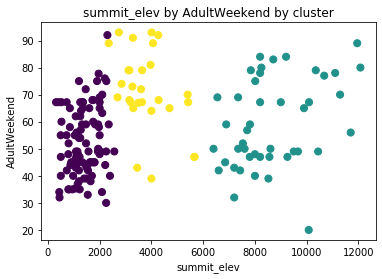

In [297]:
plt.scatter(df['summit_elev'], df['AdultWeekend'], c=df['New_Column_Cluster'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('AdultWeekend')
plt.title('summit_elev by AdultWeekend by cluster')
plt.savefig('./figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [289]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, './models/regression_model_adultweekend.joblib') 

['./models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 

In [286]:
coeff_df=pd.DataFrame(lm.coef_,index=feature_names,columns=['Linear Model Coeff'])
coeff_df=coeff_df.reset_index().rename(columns={'index': 'Features'})

In [287]:
coeff_df['Explained Variance']=[score]+['']*(len(coeff_df)-1)
coeff_df['Root Mean Square Error']=[rmse]+['']*(len(coeff_df)-1)
coeff_df

,Features,Linear Model Coeff,Explained Variance,Root Mean Square Error
0,summit_elev,-3.649811e+00,0.68312,8.21357
1,vertical_drop,2.727608e+00,,
2,trams,-1.776357e-15,,
3,fastEight,1.332268e-15,,
4,fastSixes,1.554312e-15,,
5,fastQuads,-5.862046e-01,,
6,quad,1.345504e+00,,
7,triple,4.331663e-01,,
8,double,1.045825e+00,,
9,surface,-1.227476e+00,,


In [288]:
coeff_df.to_csv('./models/Model_coefficients_performance.csv')